**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto..

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas 
import seaborn as sns
sns.set_context('talk')

In [ ]:
import plotly
plotly.__version__
# Make sure it's 4.14.3

'4.4.1'

In [ ]:
# To update plotly, uncomment and run the following line:
#!pip install plotly --upgrade

In [2]:
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


## Ejercicio 1: 

1. Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

1. Investigar la distribución de las variables del conjunto de datos y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad.
  1. Justificar cada columna no seleccionada.
  2. Para las variables categóricas seleccionadas, agrupe o combine las categorías poco frecuentes para asegurar que todos los grupos tengan un número mínimo de registros.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.


##Ejercicio 1
**Punto 1**

In [3]:
#Análisis de valores extremos sobre la distribución del precio
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [4]:
melb_df.Price.describe().round()   #La variable precio no tiene datos faltantes, tiene un mínimo de $85.000 y un máximo de $9.000.000.

count      13580.0
mean     1075684.0
std       639311.0
min        85000.0
25%       650000.0
50%       903000.0
75%      1330000.0
max      9000000.0
Name: Price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


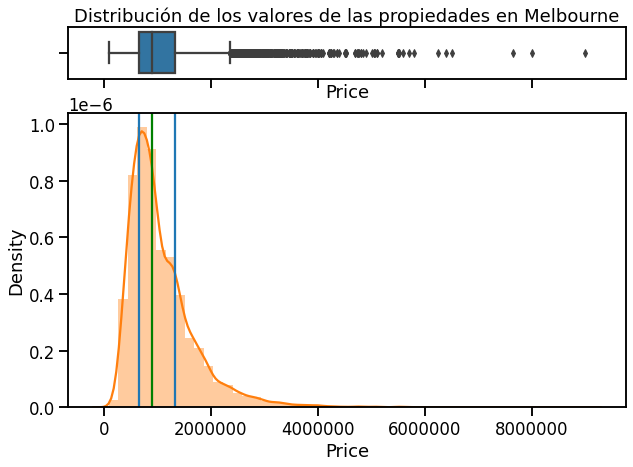

In [5]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,7),gridspec_kw={"height_ratios": (.15, .85)})
 
#Se añade un gráfico a cada parte

sns.boxplot(melb_df.Price, ax=ax_box)
sns.distplot(melb_df.Price, ax=ax_hist, kde=False, hist=False)
sns.distplot(melb_df.Price, ax=ax_hist, kde=True, hist=True,norm_hist=False)

plt.axvline(melb_df.Price.quantile(0.25))
plt.axvline(melb_df.Price.quantile(0.50),color='g')
plt.axvline(melb_df.Price.quantile(0.75))
plt.ticklabel_format(style='plain', axis='x') 
 
ax_box.set_title("Distribución de los valores de las propiedades en Melbourne")
plt.show()


Se advierte que la distribución de los valores de las propiedades en Melbourne está sesgada a la izquierda (o asimétrica derecha), con un valor mínimo de \$85.000 y un máximo de \$9.000.000.
Si bien no contamos con un conocimiento previo sobre la temática, podríamos concluir a partir del boxplot que existen ciertos valores outliers para el valor de las propiedades sobre todo entre aquellos valores más altos. Estos podrían ser eliminados para no afectar la capacidad de predecir el valor de venta las propiedades a futuro. Dado el escaso conocimiento que tenemos sobre la temática, se optará por emplear el criterio del rango intercuartílico para eliminación de datos outliers.

In [6]:
melb_df.Price.quantile(.95).round()
#Se podría definir una regla objetiva para eliminar datos outliers como: 1.5 veces el RI por encima o por debajo de los cuartiles 1 y 3. 
q25=melb_df.Price.quantile(.25)
q75=melb_df.Price.quantile(.75)
RI=q75-q25
min=q25-1.5*RI
max=q75+1.5*RI
print("Nuevo mínimo=", min)   #como el mínimo es negativo, tomaría cero como el mínimo. Es decir, solo restringiríamos la cola derecha de la distribución
print("Nuevo máximo=", max)

Nuevo mínimo= -370000.0
Nuevo máximo= 2350000.0


In [7]:
#Eliminación de los valores outliers de la variable Precio
melb_df2=melb_df[melb_df.Price<max]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


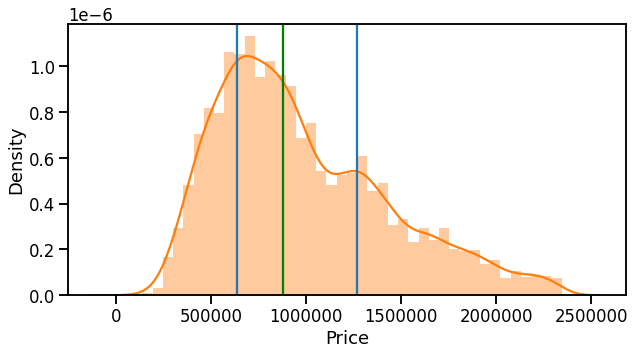

In [8]:
plt.figure(figsize=(10,5))
sns.distplot(melb_df2.Price, kde=False, hist=False)
sns.distplot(melb_df2.Price, kde=True, hist=True,norm_hist=False)

plt.axvline(melb_df2.Price.quantile(0.25))
plt.axvline(melb_df2.Price.quantile(0.50),color='g')
plt.axvline(melb_df2.Price.quantile(0.75))
plt.ticklabel_format(style='plain', axis='x') 
 
ax_box.set_title("Distribución de los valores de las propiedades en Melbourne, sin datos outliers")
plt.show()

In [ ]:
# melb_df2 es el dataset que usaremos en adelante, con la variable precio filtrada y sin datos outliers.

**Punto 2**
1. Investigar la distribución de las variables del conjunto de datos y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad.
  1. Justificar cada columna no seleccionada.
  2. Para las variables categóricas seleccionadas, agrupe o combine las categorías poco frecuentes para asegurar que todos los grupos tengan un número mínimo de registros.

In [9]:
melb_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12956 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         12956 non-null  object 
 1   Address        12956 non-null  object 
 2   Rooms          12956 non-null  int64  
 3   Type           12956 non-null  object 
 4   Price          12956 non-null  float64
 5   Method         12956 non-null  object 
 6   SellerG        12956 non-null  object 
 7   Date           12956 non-null  object 
 8   Distance       12956 non-null  float64
 9   Postcode       12956 non-null  float64
 10  Bedroom2       12956 non-null  float64
 11  Bathroom       12956 non-null  float64
 12  Car            12897 non-null  float64
 13  Landsize       12956 non-null  float64
 14  BuildingArea   6766 non-null   float64
 15  YearBuilt      7798 non-null   float64
 16  CouncilArea    11670 non-null  object 
 17  Lattitude      12956 non-null  float64
 18  Longti

Podemos agrupar a las variables por tipo para hacer algunos análisis

*Cuantitativa*: Rooms Price Distance Bedroom2 Bathroom Car Landsize BuildingArea   Propertycount

*Categórica*: Suburb Address Type Method SellerG  CouncilArea Regionname

*Tiempo*: Date  YearBuilt 

*Códigos y localización*: Postcode Lattitude  Longtitude  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

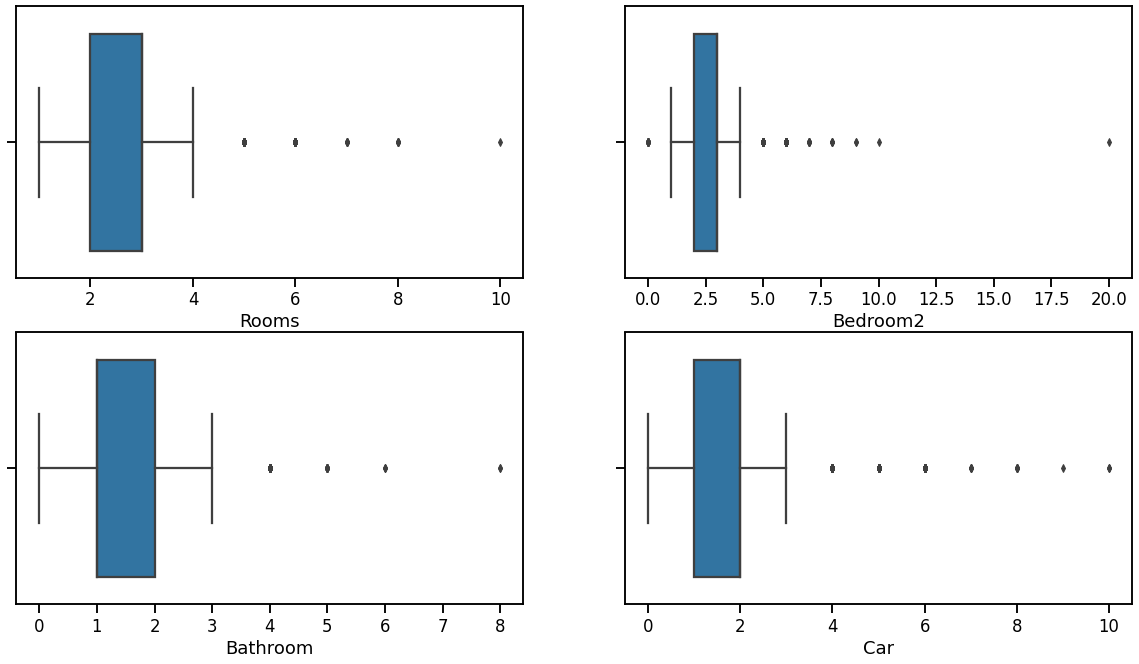

In [10]:
 #Análisis de las variables cuantitativas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 11))
sns.boxplot(melb_df2.Rooms, ax=axes[0,0])
sns.boxplot(melb_df2.Bedroom2, ax=axes[0,1])
sns.boxplot(melb_df2.Bathroom, ax=axes[1,0])
sns.boxplot(melb_df2.Car, ax=axes[1,1])
plt.show()


In [ ]:
melb_df2.Landsize.describe()    #no tiene datos NaN pero tiene una variabilidad enorme y muchos "0", lo cual no tiene sentido

count    12956.000000
mean       517.115313
std       1498.205505
min          0.000000
25%        168.000000
50%        416.000000
75%        645.000000
max      76000.000000
Name: Landsize, dtype: float64

In [ ]:
melb_df2.BuildingArea.describe()  #tiene muchos valores perdidos y además muchos "0", los cuales tampoco tienen sentido.

count     6766.000000
mean       144.997402
std        552.864779
min          0.000000
25%         91.000000
50%        122.000000
75%        165.000000
max      44515.000000
Name: BuildingArea, dtype: float64

In [ ]:
print("Porcentaje de datos perdidos=", melb_df2.BuildingArea.isna().sum()/len(melb_df2)*100,"%")

Porcentaje de datos perdidos= 47.77709169496758 %


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


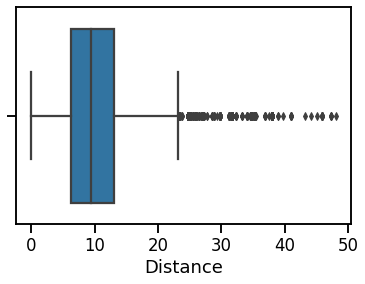

In [11]:
sns.boxplot(melb_df2.Distance)   #Esta variable es relevante para la explicación del precio

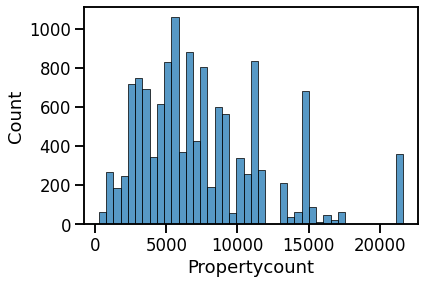

In [ ]:
sns.histplot(melb_df2.Propertycount)  #representa la cantidad de propiedades que existen en el mismo Suburb, es relevante por que da una idea de la oferta disponible y de la densidad de la zona tmb

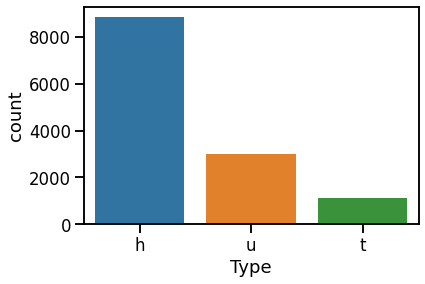

In [ ]:
sns.countplot(data=melb_df2, x="Type")

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

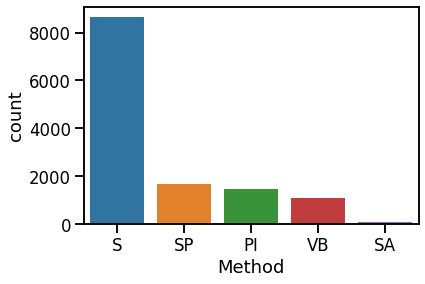

In [ ]:
sns.countplot(data=melb_df2, x="Method")   #habría que comprender mejor qué información nos da esta variable y vemos de reagruparla.

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

In [ ]:
melb_df2.SellerG.describe()   #Son muchas categorías posibles, a primera vista no podremos juzgar nada respecto de ella. Pero eventualmente, ciertos vendedores podrían asociarse con ventas a mayor precio.

count      12956
unique       265
top       Nelson
freq        1548
Name: SellerG, dtype: object

Sobre la localización de la casa para explicar el precio, tenemos distintos niveles de precisión para explicarlo. 

1- La dirección exacta (no nos dice nada puntual, ya que no tenemos conocimiento del dominio)

2- El suburbio, son muchas categorías aún, pero se encuentra un poco más agrupada que 1. **Puede estar vinculada a POSTCODE, que usaremos para los merge de datos con otras bases**

3- CouncilArea, son más de 30 categorías que agrupan a varios suburbs y representa el Consejo Gubernamental de la zona.

4- Regionname, es la variable que agrupa en mayor medida a las casas según localización. De momento, será esta la variable que tomemos de referencia para analizar. 

5- Latitud y longitud, puede emplearse directamente para graficar ubicaciones o para medir distancias con respecto a distintos puntos relevantes. Puede ser muy interesante para explicar el precio de venta de una propiedad.

In [ ]:
melb_df2.Suburb.describe()   #Hay 314 suburb distintos, que sin info de dominio no me dicen mucho. Pero en algún modelo relacional puede explicar.
#No podríamos definir ninguna manera de agruparla, pero tampoco la eliminaría

count         12956
unique          314
top       Reservoir
freq            359
Name: Suburb, dtype: object

In [ ]:
melb_df2.CouncilArea.describe()

count        11670
unique          33
top       Moreland
freq          1160
Name: CouncilArea, dtype: object

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

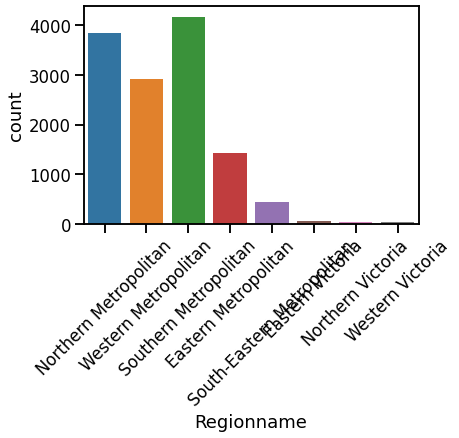

In [ ]:
sns.countplot(data=melb_df2, x="Regionname")
plt.xticks(rotation=45)

In [ ]:
melb_df2.Regionname.value_counts()   #En base a esto, agruparía de la siguiente manera: las últimas 3 categorías en una sola "Victoria" y Eastern con southeastern

Southern Metropolitan         4177
Northern Metropolitan         3846
Western Metropolitan          2925
Eastern Metropolitan          1435
South-Eastern Metropolitan     447
Eastern Victoria                53
Northern Victoria               41
Western Victoria                32
Name: Regionname, dtype: int64

In [ ]:
new_groups = {
    'Eastern Victoria': 'Victoria',
    'Northern Victoria': 'Victoria',
    'Western Victoria': 'Victoria',
    'Southern Metropolitan': 'Southern Metropolitan',
    'Northern Metropolitan': 'Northern Metropolitan',
    'Western Metropolitan': 'Western Metropolitan',
    'Eastern Metropolitan': 'South-Eastern Metropolitan',
    'South-Eastern Metropolitan': 'South-Eastern Metropolitan',
}
grouped_region = melb_df2.Regionname.replace(new_groups)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

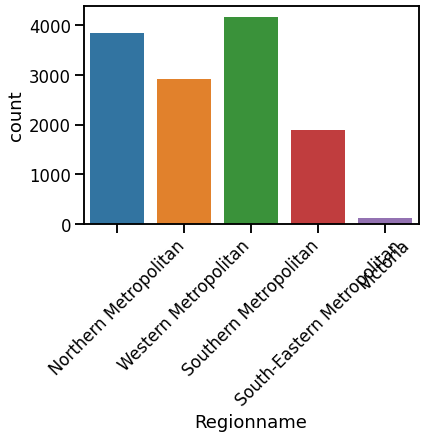

In [ ]:
sns.countplot(data=melb_df2, x=grouped_region)
plt.xticks(rotation=45)

Sobre las variables de tiempo, tenemos Date y YearBuilt. 

**Primero comentar con los chicos las transformaciones que quedaron pendientes en los ejercicios de clase y ver si usarlas.** 

*Podríamos crear varíables categóricas para la antiguedad que indiquen: Menos de 10 años de antiguedad, entre 10 y 20 años de antiguedad, entre 20 y 30 años de antiguedad, entre 30 y 40 años de antiguedad, etc.

In [ ]:
melb_df2.YearBuilt.describe()

count    7798.000000
mean     1965.767120
std        36.555041
min      1196.000000
25%      1950.000000
50%      1970.000000
75%      2000.000000
max      2018.000000
Name: YearBuilt, dtype: float64

In [ ]:
#Pero ojo! Tiene muchos datos faltantes.
print("Porcentaje de datos perdidos=", melb_df2.YearBuilt.isna().sum()/len(melb_df2)*100,"%")

Porcentaje de datos perdidos= 39.81167026860142 %


In [ ]:
melb_df2.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
relevant_columns=['Rooms', 'Type', 'Price', 'Method',
       'Date', 'Distance', 'Postcode', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'SellerG']

En resumen, abajo se detallan las variables de dejar fuera del análisis y su justificación:

Suburb, Address, CouncilArea serán dejadas de lado dado que sin conocimiento del dominio no nos sirven para vincularlas al precio, optaremos por una categorización más general para la localización (dada por Regionname), el código postal (POSTCODE) para cuando necesitemos vincular a datos de otras fuentes de datos y Latitud-Longitud cuando querramos una referencia exacta de la localización. Adicionalmente, se considera como variable relevante para predecir el precio de venta a la distancia de la casa hasta el CBD (Distance), la cual representa de una manera sintética la información de las variables que fueron eliminadas.

Bethroom2 será dejada de lado por tener una alta correlación con la variable Room, con lo cual se tomará de referencia la variable Room que está más completa y confiable.

Por otro lado, también dejaría de lado SellerG dado que sin conocimiento extra, no nos aporta información relevante. Tienen muchas categorías, las cuales no pueden agruparse sin conocimiento adicional, podría tener alguna correlación con Suburb o podría identificarse ciertos vendedores que se vinculen con ventas a precios más altos. Nos obstante, en esta instancia no nos aporta información relevante. **Se podría dejar para mas adelante, ver como procesarla.

**Ejercicio 1**

3. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.


In [ ]:
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]
airbnb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22895 entries, 0 to 22894
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   description            22563 non-null  object 
 1   neighborhood_overview  14424 non-null  object 
 2   street                 22895 non-null  object 
 3   neighborhood           17082 non-null  object 
 4   city                   22895 non-null  object 
 5   suburb                 22872 non-null  object 
 6   state                  22834 non-null  object 
 7   zipcode                22753 non-null  object 
 8   latitude               22895 non-null  float64
 9   longitude              22895 non-null  float64
 10  price                  22895 non-null  int64  
 11  weekly_price           2524 non-null   float64
 12  monthly_price          1891 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 2.3+ MB


In [ ]:
relevant_cols = ['price', 'weekly_price', 'monthly_price', 'zipcode']
airbnb_price_by_zipcode = airbnb_df[relevant_cols].groupby('zipcode')\
  .agg({'price': ['mean', 'count'], 'weekly_price': ['mean', 'count'],
        'monthly_price': ['mean', 'count']})\
  .reset_index()
# Flatten the two level columns
airbnb_price_by_zipcode.columns = [
  ' '.join(col).strip()
  for col in airbnb_price_by_zipcode.columns.values]
# Rename columns
airbnb_price_by_zipcode = airbnb_price_by_zipcode.rename(
    columns={'price mean': 'airbnb_price_mean',
             'price count': 'airbnb_record_count',
             'weekly_price mean': 'airbnb_weekly_price_mean',
             'weekly_price count': 'airbnb_weekly_price_count',
             'monthly_price mean': 'airbnb_monthly_price_mean',
             'monthly_price count': 'airbnb_monthly_price_count'}
)

In [ ]:
#ver bien a cuáles le pone NaN, si siempre que tenga una observación sin dato pone NaN a todo el promedio
print("NaN de price:",airbnb_price_by_zipcode.airbnb_price_mean.isna().sum()/len(airbnb_price_by_zipcode)*100,"%.")
print("NaN de weekly price:",airbnb_price_by_zipcode.airbnb_weekly_price_mean.isna().sum()/len(airbnb_price_by_zipcode)*100,"%.")
print("NaN de monthly price:",airbnb_price_by_zipcode.airbnb_monthly_price_mean.isna().sum()/len(airbnb_price_by_zipcode)*100,"%.")

NaN de price: 0.0 %.
NaN de weekly price: 56.803455723542115 %.
NaN de monthly price: 60.69114470842333 %.


In [ ]:
airbnb_price_by_zipcode[:]

,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_weekly_price_count,airbnb_monthly_price_mean,airbnb_monthly_price_count
0,2010,40.000000,1,NaN,0,NaN,0
1,2134,50.000000,1,NaN,0,NaN,0
2,2582,104.000000,1,NaN,0,NaN,0
3,3000,149.236050,2491,804.000000,2,3469.0,2
4,3001,120.000000,1,NaN,0,NaN,0
...,...,...,...,...,...,...,...
458,3977,79.105263,19,422.000000,4,1025.0,2
459,3978,197.250000,4,950.666667,3,7770.0,1
460,3980,60.000000,1,NaN,0,NaN,0
461,VIC,150.000000,1,NaN,0,NaN,0


In [ ]:
airbnb_price_by_zipcode=airbnb_price_by_zipcode[airbnb_price_by_zipcode.airbnb_monthly_price_count>10]

In [ ]:
airbnb_price_by_zipcode['zipcode'] = pandas.to_numeric(airbnb_df.zipcode, errors='coerce')

In [ ]:
merged_sales_df = melb_df2.merge(
    airbnb_price_by_zipcode, how='left',
    left_on='Postcode', right_on='zipcode'
)

Otras maneras posibles de hacer el merge podrían ser:
- Explorar la variable suburb y ver cuántas coincidencias hay/no hay, sería una posibilidad. 
- La otra posibilidad sería pensar coincidencias por latitud-longitud, armar grupos de zonas en base a coordenadas. Armar los gurpos de igual manera en los dos datasets y unirlos en base a esa variable key.
- Otra alternativa sería asociarla con el precio promedio de las casas que se encuentran más cerca. Diseñar algún algoritmo que mida distancias hacia a algún punto según lat y longitud, y luego definir un delta máximo para la distancia permitida.

## Ejercicio 2: Imputación

1. Imputar los valores faltantes de la columna CouncilArea en base a la información presente en Suburb. (Si en el punto anterior no seleccionó ninguna de estas variables, agréguelas ahora el conjunto de datos).

2. Imputar los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de AirBnB.



In [ ]:
#notar que la variable CouncilArea representa el Gobierno

In [ ]:
print("NaN de Suburbio=", melb_df.Suburb.isna().sum())
print("NaN de CouncilArea=", melb_df.CouncilArea.isna().sum())

NaN de Suburbio= 0
NaN de CouncilArea= 1369


In [ ]:
melb_df.Suburb.describe()    #314 categorías para Suburb

count         13580
unique          314
top       Reservoir
freq            359
Name: Suburb, dtype: object

In [ ]:
melb_df.CouncilArea.describe()    #33 categorías para CouncilArea, con lo cual un CouncilArea abarca a más de un Suburbio

count        12211
unique          33
top       Moreland
freq          1163
Name: CouncilArea, dtype: object

In [ ]:
melb_df[["CouncilArea","Suburb"]]

,CouncilArea,Suburb
0,Yarra,Abbotsford
1,Yarra,Abbotsford
2,Yarra,Abbotsford
3,Yarra,Abbotsford
4,Yarra,Abbotsford
...,...,...
13575,NaN,Wheelers Hill
13576,NaN,Williamstown
13577,NaN,Williamstown
13578,NaN,Williamstown


## Ejercicio 3

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.